# problem - 1

### 1.	Officeworks is a leading retail store in Australia, with numerous outlets around the country. The manager would like to improve the customer experience by providing them online predictive prices for their laptops if they want to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough. Apply Lasso and Ridge Regression model on the dataset and predict the price, given other attributes. Tabulate R squared, RMSE, and correlation values.

In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

import joblib,pickle
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
retail = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day33-Lasso and Ridge Reg\Datasets_LassoRidge\Datasets_LassoRidge\RetailPrices_data.csv")
retail

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [61]:
#drop unwanted columns
retail.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [62]:
#viewing the columns
retail.columns

Index(['price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi', 'premium',
       'ads', 'trend'],
      dtype='object')

In [63]:
retail = pd.get_dummies(retail,drop_first=True)
retail.head()

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1


In [64]:
X=retail.iloc[:, 1:]
y=retail.iloc[:, 0]

In [65]:
X.head(2)

,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,25,80,4,14,94,1,0,0,1
1,33,85,2,14,94,1,0,0,1


In [66]:
y.head(2)

0    1499
1    1795
Name: price, dtype: int64

In [67]:
# X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.30,random_state=0)
# print(X_train.shape)
# print(X_test.shape)

In [68]:
#LASSO regression

lasso = Lasso(alpha=0.13, normalize=True).fit(X,y)

#coeff for all independemt variable
lasso.coef_

array([   8.64148222,    0.65933879,   49.771742  ,  113.0984382 ,
          0.52827241,  -47.24277634,   44.97699744,   66.30232167,
       -451.94935849])

In [69]:
lasso.intercept_

443.9043262594223

<BarContainer object of 9 artists>

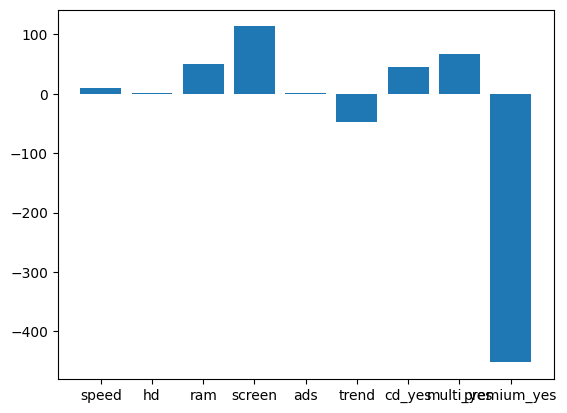

In [70]:
plt.bar(height=lasso.coef_, x= X.columns)

In [71]:
#create a fun called lasso
lasso_pred = lasso.predict(X)

#adjusted rsqr
s1 = lasso.score(X,y)
print(s1)

#RMsE
np.sqrt(np.mean((lasso_pred - np.array(y))**2))

0.7715870508830522


277.5589460664741

In [72]:
#RIDGE regression

ridge = Ridge(alpha=0.13,normalize=True).fit(X,y)

#coefficient values for all independent variables
ridge.coef_

array([   7.59338238,    0.58574836,   45.81575744,  112.44251877,
          0.65728505,  -39.9077332 ,   55.22109558,   56.23217712,
       -403.63850803])

In [73]:
res = ridge.coef_.flatten()
ridge.intercept_

379.1223980539057

<BarContainer object of 9 artists>

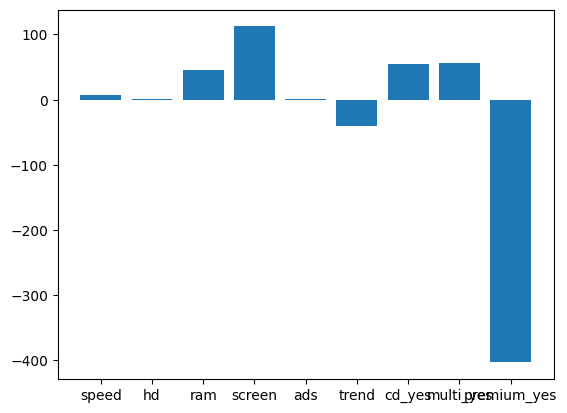

In [74]:
plt.bar(height=res,x=X.columns)

In [75]:
#create a fun called ridge pred
ridge_predict = ridge.predict(X)

#adjusted r2
s2 = ridge.score(X,y)
print(s2)

#RMSE
np.sqrt(np.mean((ridge_predict - np.array(y))**2))

0.7556120115343712


287.101061051077

In [76]:
#ELASTIC net
from sklearn.linear_model import ElasticNet
elastic  =ElasticNet(alpha=0.13).fit(X,y)

print(elastic.coef_)
print(elastic.intercept_)

[   9.16091322    0.75334212   47.78902661  114.88339799    0.79937544
  -49.57043765   34.49854882   57.38584959 -276.82324094]
193.2678042746029


<BarContainer object of 9 artists>

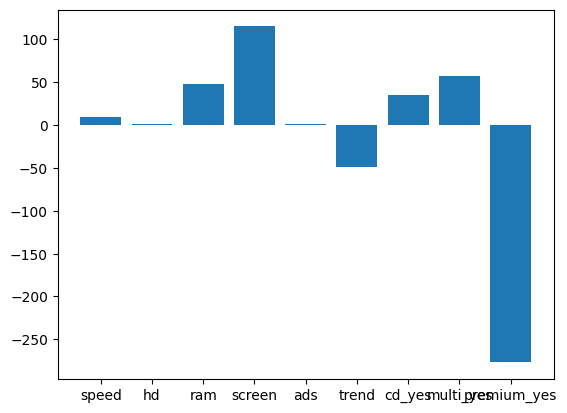

In [77]:
plt.bar(height=elastic.coef_,x=X.columns)

In [78]:
#predict
elastic_pred = elastic.predict(X)

#adjusted rsqr
s3 = elastic.score(X,y)
print(s3)

#RMSE
np.sqrt(np.mean((elastic_pred - np.array(y))**2))

0.7622054036158544


283.20170255908454

In [79]:
############################Lasso Regression#######################
lasso = Lasso()
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-2,1,4,5,15,20]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='r2',cv=5)
lasso_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 4, 5,
                                   15, 20]},
             scoring='r2')

In [80]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)
lasso_pred = lasso_reg.predict(X)

{'alpha': 0.01}
0.6807514498503175


In [81]:
#adjusted r2
s4 = lasso_reg.score(X,y)
print(s4)

#RMSE
np.sqrt(np.mean((lasso_pred - np.array(y))**2))

0.7755675745474575


275.1298241746157

In [82]:
##################### RIDGE REGRESSSION ######################
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-2,1,4,5,15,20]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_reg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 4, 5,
                                   15, 20]},
             scoring='r2')

In [83]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
ridge_pred = ridge_reg.predict(X)

{'alpha': 20}
0.6811137645941264


In [84]:
#adjusted sqr
s5 = ridge_reg.score(X,y)
print(s5)
#RMSE
np.sqrt(np.mean((ridge_pred - np.array(y))**2))

0.7754688411653541


275.19033573188426

In [85]:
############################# ElasticNet Regression #######################
enet = ElasticNet()
parameters ={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-2,1,4,5,15,20]}
enet_reg = GridSearchCV(enet,parameters,scoring='r2',cv=5)
enet_reg.fit(X,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 4, 5,
                                   15, 20]},
             scoring='r2')

In [86]:
print(enet_reg.best_params_)
print(enet_reg.best_score_)
enet_pred = enet_reg.predict(X)

{'alpha': 0.01}
0.681131848475671


In [87]:
#adjusted r2
s6 = enet_reg.score(X,y)
print(s6)
#RMSE
np.sqrt(np.mean((enet_pred - np.array(y))**2))

0.775335024012874


275.27232814249334

In [88]:
scores_all = pd.DataFrame({'models':['Lasso', 'Ridge', 'Elasticnet', 'Grid_lasso', 'Grid_ridge', 'Grid_elasticnet'],
                           'Scores':[s1, s2, s3, s4, s5, s6]})

scores_all

,models,Scores
0,Lasso,0.771587
1,Ridge,0.755612
2,Elasticnet,0.762205
3,Grid_lasso,0.775568
4,Grid_ridge,0.775469
5,Grid_elasticnet,0.775335


'Best score obtained is for Gridsearch lasso Regression'

In [89]:
final_grid = lasso_reg.best_estimator_
final_grid

Lasso(alpha=0.01)

# problem-2

### An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge Regression on it. Please use the below columns for the analysis: Price, Age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, Weight. 

In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

import joblib,pickle
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [164]:
import os
os.chdir(r"D:\360 Data Science 360DigiTMG\Day33-Lasso and Ridge Reg\Datasets_LassoRidge\Datasets_LassoRidge")

In [165]:
cars = pd.read_csv("ToyotaCorolla.csv",usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],encoding='ISO-8859-1')
cars.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [166]:
X = cars.iloc[:, 1:]  #independent features
y = cars.iloc[:,0]    #dependent features

In [167]:
X.head(2)

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165


In [168]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [169]:
#lasso regression
lasso = Lasso(alpha=0.15,normalize=True).fit(X,y)

#coeff for all inndependent variable
print(lasso.coef_)
print(lasso.intercept_)

[-1.21655277e+02 -2.06620356e-02  3.12427200e+01 -9.95464577e-02
 -0.00000000e+00  5.71391285e+02  3.66944596e+00  1.69367828e+01]
-5416.896726220093


<BarContainer object of 8 artists>

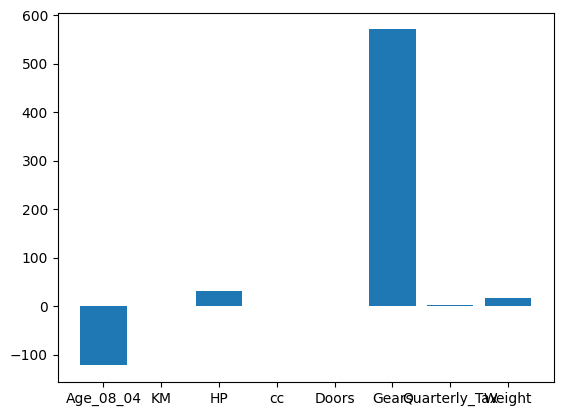

In [170]:
plt.bar(height=lasso.coef_, x=X.columns)

In [171]:
lasso_pred = lasso.predict(X)
#adjusted r2
s1 = lasso.score(X,y)
print(s1)
#RMSE
np.sqrt(np.mean((lasso_pred - np.array(y))**2))

0.8637461037221101


1338.3401613483165

In [172]:
##ridge regression
ridge = Ridge(alpha=0.15,normalize=True).fit(X,y)
#coeff for all independent variable
print(ridge.coef_)
print(ridge.intercept_)

[-1.04326114e+02 -2.24400504e-02  2.99664614e+01 -4.07929787e-02
  4.35259203e+01  5.87315875e+02  5.06281850e+00  1.63828851e+01]
-6010.626511531376


<BarContainer object of 8 artists>

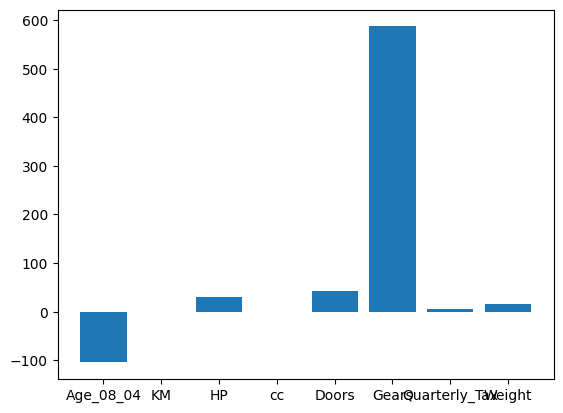

In [173]:
plt.bar(height=ridge.coef_, x=X.columns)

In [174]:
#predict
ridge_pred = ridge.predict(X)
#adjusted rsqr
s2 = ridge.score(X,y)
print(s2)
#RMSE
np.sqrt(np.mean((ridge_pred - np.array(y))**2))

0.8569049858483841


1371.5267945582648

In [175]:
#Elastic net regression
elnet = ElasticNet(alpha=0.15).fit(X,y)
#coefficient
print(elnet.coef_)
print(elnet.intercept_)

[-1.21702796e+02 -2.06340152e-02  3.30942258e+01 -1.23830869e-01
 -1.60497719e+01  1.78848955e+02  4.07434520e+00  1.69742789e+01]
-3603.451209974177


<BarContainer object of 8 artists>

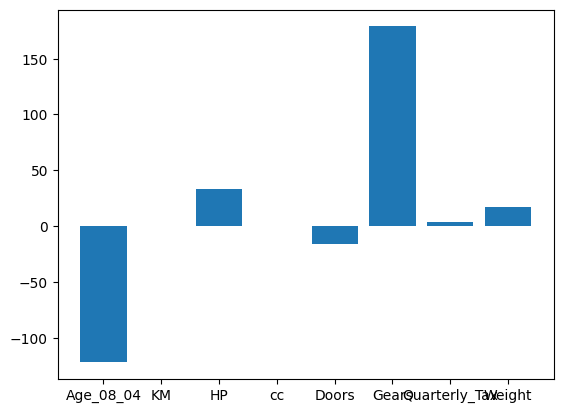

In [176]:
plt.bar(height=elnet.coef_, x=X.columns)

In [177]:
elnet_pred = elnet.predict(X)
#adjuster rsq
s3= elnet.score(X,y)
print(s3)
#RMSE
np.sqrt(np.mean((elnet_pred - np.array(y))**2))

0.8633381512879108


1340.3421997432072

In [178]:
########################## lasso regression ####################################
lasso_reg = Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
lasso_reg =GridSearchCV(lasso_reg,parameters,scoring='r2',cv=5).fit(X,y)

print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 20}
0.033617319549919825


In [179]:
lasso_pred = lasso_reg.predict(X)
#adjusted r2
s4 = lasso_reg.score(X,y)
print(s4)
#rmse
np.sqrt(np.mean((lasso_pred - np.array(y))**2))

0.8628616158045578


1342.677031274869

In [180]:
################################ ridge regression ####################################
ridge_reg = Ridge()
ridge_reg = GridSearchCV(ridge_reg,parameters,scoring = "r2",cv=5).fit(X,y)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 20}
0.03172779599286475


In [181]:
ridge_pred = ridge_reg.predict(X)
#adjusted r2
s5 = ridge_reg.score(X,y)
print(s5)
np.sqrt(np.mean((ridge_pred - np.array(y))**2))

0.8636841080334173


1338.644599923682

In [ ]:
################################## elastic_net ###########################################

In [182]:
enet = ElasticNet()
enet =GridSearchCV(enet,parameters,scoring='r2',cv=5).fit(X,y)
print(enet.best_params_)
print(enet.best_score_)

{'alpha': 20}
0.04722454566298342


In [183]:
enet_pred = enet.predict(X)
#adjusted r2
s6 = enet.score(X,y)
print(s6)
#RMSE
np.sqrt(np.mean((enet_pred - np.array(y))**2))

0.862269589125913


1345.5720798707518

In [185]:
scores_all = pd.DataFrame({'models':['Lasso','Ridge','Elasticnet','Grid_lasso', 'Grid_ridge','Grid_enet'],
                          'scores':[s1,s2,s3,s4,s5,s6]})
scores_all

,models,scores
0,Lasso,0.863746
1,Ridge,0.856905
2,Elasticnet,0.863338
3,Grid_lasso,0.862862
4,Grid_ridge,0.863684
5,Grid_enet,0.862270


'Best score obtained is for Lasso Regression'

In [188]:
final_model = lasso_reg.best_estimator_
final_model

Lasso(alpha=20)

# problem - 3

### 3.	Data of various countries and the factors affecting their life expectancy has been recorded over the past few decades. An analytics firm would like to know how it varies country wise and what factors are influential. Use your skills to analyze the data and build a Lasso and Ridge Regression model and summarize the output. Snapshot of the dataset is given below.

In [291]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

import joblib,pickle
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [292]:
#reading files to python
life = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day33-Lasso and Ridge Reg\Datasets_LassoRidge\Datasets_LassoRidge\Life_expectencey_LR.csv")
pd.set_option('display.max_columns', None)
life

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [293]:
#shape of the data
life.shape

(2938, 22)

In [294]:
#chcking for null values
life.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_expectancy            10
Adult_Mortality            10
infant_deaths               0
Alcohol                   194
percentage_expenditure      0
Hepatitis_B               553
Measles                     0
BMI                        34
under_five_deaths           0
Polio                      19
Total_expenditure         226
Diphtheria                 19
HIV_AIDS                    0
GDP                       448
Population                652
thinness                   34
thinness_yr                34
Income_composition        167
Schooling                 163
dtype: int64

In [295]:
life = life.dropna()

In [296]:
life = pd.get_dummies(life,drop_first=True)
life.head()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Costa Rica,Country_Croatia,Country_Cyprus,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_India,Country_Indonesia,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [297]:
#seperating the input an output variables
X = life.drop('Life_expectancy',axis=1)
y = life['Life_expectancy']

In [298]:
X.head(2)

,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness,thinness_yr,Income_composition,Schooling,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,Country_Costa Rica,Country_Croatia,Country_Cyprus,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_El Salvador,Country_Equatorial Guinea,Country_Eritrea,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Guinea-Bissau,Country_Guyana,Country_Haiti,Country_Honduras,Country_India,Country_Indonesia,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kiribati,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Liberia,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritania,Country_Mauritius,Country_Mexico,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Namibia,Country_Nepal,Country_Netherlands,Country_Nicaragua,Country_Niger,Country_Nigeria,Country_Pakistan,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [299]:
y.head(2)

0    65.0
1    59.9
Name: Life_expectancy, dtype: float64

In [300]:
# Regularization Techniques: LASSO, RIDGE and Elasticnet Regression


######################LASSO REGRESSION############################
lasso = Lasso(alpha=0.15,normalize=True).fit(X,y)

print(lasso.coef_)
print(lasso.intercept_)

[ 0.         -0.         -0.          0.          0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.         -0.         -0.          0.12336087
  0.10377332  0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.          0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0. 

<BarContainer object of 152 artists>

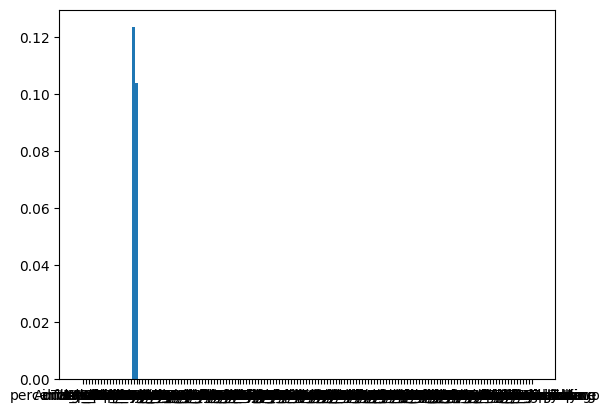

In [301]:
plt.bar(height=pd.Series(lasso.coef_), x=pd.Series(X.columns))

In [302]:
pred_lasso = lasso.predict(X)

#adjusted r2
s1 = lasso.score(X,y)
print(s1)

#RMSE
np.sqrt(np.mean((pred_lasso - np.array(y))**2))

0.05046489557305733


8.569395594458687

In [303]:
########################## RIDGE REGRESSION #############################
ridge = Ridge(alpha=0.15,normalize=True).fit(X,y)

print(ridge.coef_)
print(ridge.intercept_)

[ 6.14418102e-02 -6.42141532e-03 -6.76037597e-04  4.42601842e-02
  9.22126638e-05  3.01575378e-03 -3.08877885e-06  1.92414119e-02
 -1.26842488e-03  8.22620512e-03  5.55878058e-03  8.51164674e-03
 -2.83858381e-01  2.14853557e-05  1.07591274e-09 -1.06670043e-01
 -7.66640304e-02  5.88244730e+00  5.94084209e-01  3.05380561e+00
  2.93085385e+00 -1.12993359e+01  2.86563807e-01  2.54333069e+00
  8.33052028e-01  3.66881985e+00  1.15154638e+00  4.91813078e+00
 -2.35486133e+00  2.35115044e+00 -1.11411300e+00 -5.20036037e+00
  3.44476719e+00  4.53045894e+00 -5.78014287e+00  1.15704067e+00
 -1.40536145e+00 -4.40396998e+00 -6.21687085e+00  3.39711157e+00
  3.41433216e-01 -7.48481619e+00  5.40069687e+00 -6.74628641e+00
 -6.81811338e+00  4.90127911e+00  4.89358391e+00  2.30693418e+00
 -2.73601848e+00  6.06382785e+00  5.13291830e-01  3.11591712e+00
  1.02941168e-01  1.88362546e+00  3.15356680e+00  1.11463017e+00
 -5.89458736e+00  9.26233284e-01  8.42858820e-02 -4.72871452e-01
 -2.59836699e+00  5.49334

<BarContainer object of 152 artists>

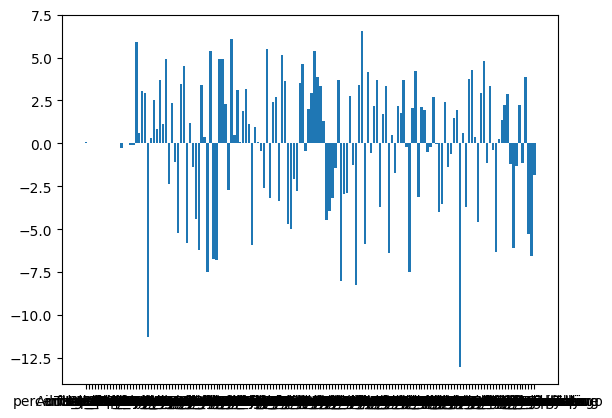

In [304]:
plt.bar(height=ridge.coef_, x=(X.columns))

In [305]:
pred_ridge = ridge.predict(X)

#adjusted r2
s2 = ridge.score(X,y)
print(s2)
#RMSE
np.sqrt(np.mean((pred_ridge - np.array(y))**2))

0.9530806986599065


1.9048923931976713

In [306]:
################################ ELASTIC REGRESSION ########################
elastic = ElasticNet(alpha=15).fit(X,y)
print(elastic.coef_)
print(elastic.intercept_)

[-0.00000000e+00 -3.44623760e-02  0.00000000e+00  0.00000000e+00
 -2.40516019e-04  0.00000000e+00  1.78711274e-05  9.06954849e-02
 -6.15700641e-03  1.64632510e-02  0.00000000e+00  3.37109991e-02
 -1.14243966e-01  2.07739852e-04  7.88417591e-09 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000

<BarContainer object of 152 artists>

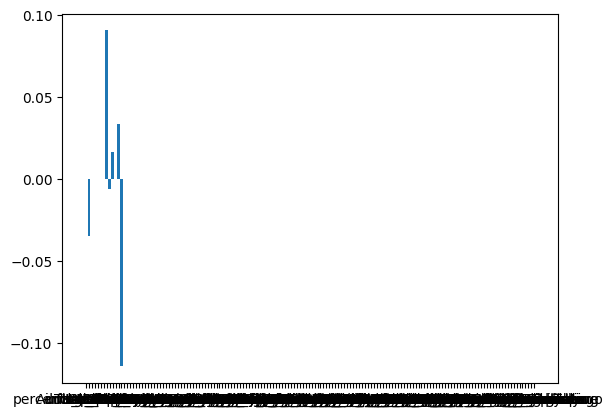

In [307]:
plt.bar(height=elastic.coef_, x=(X.columns))

In [308]:
pred_elastic = elastic.predict(X)
#adjusted r2
s3 = elastic.score(X,y)
print(s3)
#rmse
np.sqrt(np.mean((pred_elastic - np.array(y))**2))

0.6936923467158305


4.867137362747196

In [309]:
######### LASSO REGRESSION ######################################################################
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,3,5,10,15,20,40]}
lasso_reg  = GridSearchCV(lasso, parameters, scoring='r2',cv=5).fit(X,y)

print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 0.01}
0.7918625711140449


In [310]:
lasso_pred = lasso_reg.predict(X)
#adjusted r2
s4 = lasso_reg.score(X,y)
print(s4)
#rmse
np.sqrt(np.mean((lasso_pred - np.array(y))**2))

0.9275836941357836


2.366534622320341

In [311]:
###### RIDGE REGRESSION #############################################################################

ridge1 = Ridge()
ridge_reg = GridSearchCV(ridge1,parameters,scoring='r2',cv=5).fit(X,y)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 5}
0.7908699084186923


In [312]:
#pred
ridge_pred = ridge_reg.predict(X)
#adjusted r2
s5 = ridge_reg.score(X,y)
print(s5)
#rmse
np.sqrt(np.mean((ridge_pred - np.array(y))**2))

0.938811046872576


2.1753602613929175

In [313]:
###### ELASTICNET REGRESSION #############################################################################

enet = ElasticNet()
enet_reg = GridSearchCV(enet,parameters,scoring='r2',cv=5).fit(X,y)
print(enet_reg.best_params_)
print(enet_reg.best_score_)

{'alpha': 0.01}
0.7960612955574359


In [314]:
#pred
enet_pred = enet_reg.predict(X)
#adjusted r2
s6 = enet_reg.score(X,y)
print(s6)
#rmse
np.sqrt(np.mean((enet_pred - np.array(y))**2))

0.9120774241603604


2.6076234669278984

In [315]:
scores_all = pd.DataFrame({'models':['Lasso','Ridge','Elasticnet','Grid_lasso', 'Grid_ridge','Grid_enet'],
                          'scores':[s1,s2,s3,s4,s5,s6]})
scores_all

,models,scores
0,Lasso,0.050465
1,Ridge,0.953081
2,Elasticnet,0.693692
3,Grid_lasso,0.927584
4,Grid_ridge,0.938811
5,Grid_enet,0.912077


'Best score obtained is for Ridge Regression'